In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV

#datasets
from sklearn.datasets import fetch_openml

#Transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

#Regression models
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score,precision_recall_curve
from sklearn.model_selection import cross_val_score

### Import dataset. Scikit datasets are dictionary types with 'data' and 'target' as one of its keys

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
print(type(mnist))
mnist.keys()

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [31]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X.shape

(70000, 784)

In [5]:
mnist['data'][0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

(-0.5, 27.5, 27.5, -0.5)

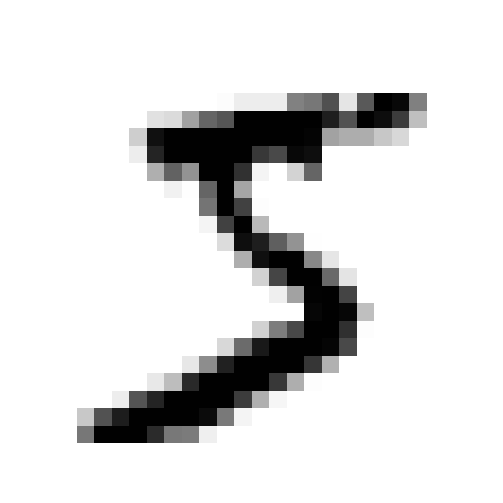

In [6]:
random_digit = X[0]
random_digit_image = random_digit.reshape(28, 28)
plt.figure(figsize=(9,9))
plt.imshow(random_digit_image, cmap='binary')
plt.axis("off")

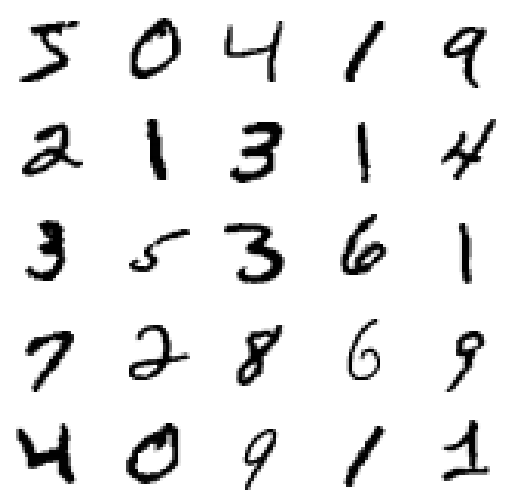

In [7]:
plt.figure(figsize=(9,9))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    random_digit = X[i-1]
    random_digit_image = random_digit.reshape(28, 28)
    plt.imshow(random_digit_image, cmap='binary')
    plt.axis("off")

In [35]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# SGD Multiclass Classification

In [11]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

(-0.5, 27.5, 27.5, -0.5)

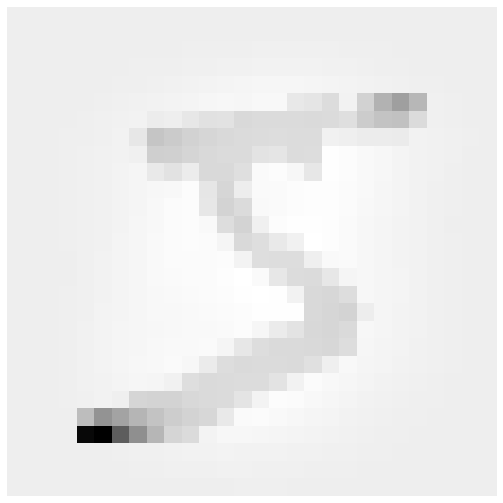

In [14]:
random_digit1 = X_train_scaled[0]
random_digit_image1 = random_digit1.reshape(28, 28)
plt.figure(figsize=(9,9))
plt.imshow(random_digit_image1, cmap='binary')
plt.axis("off")

In [15]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [16]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx_sgd = confusion_matrix(y_train, y_train_pred_sgd)
conf_mx_sgd

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

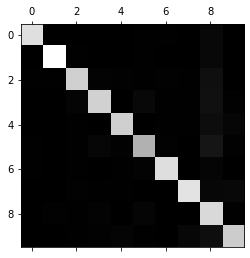

In [18]:
plt.matshow(conf_mx_sgd, cmap='gray')
plt.show()

###  Don't run SVC without scaling X_train - takes long time

In [68]:
svm_clf = SVC(gamma="auto", random_state=42)
y_train_pred_svm = cross_val_predict(svm_clf, X_train_scaled, y_train, cv=2)
conf_mx_svm = confusion_matrix(y_train, y_train_pred_svm)
conf_mx_svm

array([[5796,    2,   22,    4,    6,   15,   39,   15,   22,    2],
       [   1, 6618,   41,   12,   11,    1,    5,   30,   12,   11],
       [  19,   23, 5705,   39,   33,    3,   28,   66,   35,    7],
       [   7,   18,   95, 5739,    6,   83,    5,   85,   71,   22],
       [   6,   13,   54,    2, 5586,    6,   27,   26,   14,  108],
       [  15,   12,   20,   84,   21, 5105,   67,   48,   34,   15],
       [  22,    9,   22,    1,   13,   42, 5742,   50,   17,    0],
       [   9,   31,   42,   12,   48,    0,    1, 6028,    5,   89],
       [  13,   47,   44,   59,   21,   64,   30,   33, 5515,   25],
       [  12,    8,   22,   52,   91,   20,    1,  156,   26, 5561]],
      dtype=int64)

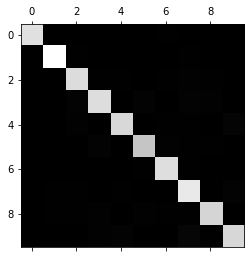

In [69]:
plt.matshow(conf_mx_svm, cmap='gray')
plt.show()

# Binary Classification for '3'

In [36]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [59]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3, method="decision_function")

In [39]:
y_train_pred_3 = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

In [42]:
confusion_matrix(y_train_3, y_train_pred_3)

array([[53477,   392],
       [ 2113,  4018]], dtype=int64)

In [43]:
precision_score(y_train_3, y_train_pred_3)

0.9111111111111111

In [44]:
recall_score(y_train_3, y_train_pred_3)

0.655358016636764

In [45]:
f1_score(y_train_3, y_train_pred_3)

0.7623565126648326

In [60]:
fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)

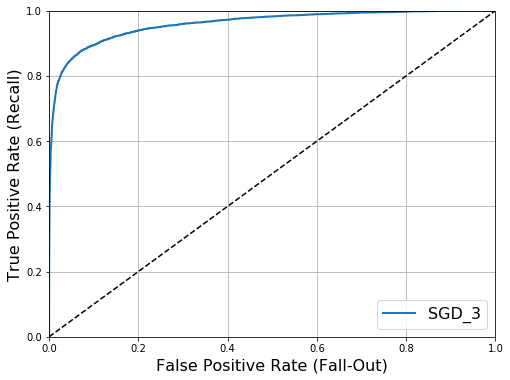

In [61]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, "SGD_3")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [62]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [63]:
y_forest_3 = cross_val_predict(forest_clf, X_train, y_train_3, cv=3)

In [64]:
confusion_matrix(y_train_3, y_forest_3)

array([[53842,    27],
       [ 1017,  5114]], dtype=int64)

In [65]:
precision_score(y_train_3, y_forest_3)

0.9947481034818129

In [66]:
recall_score(y_train_3, y_forest_3)

0.8341216767248409

In [67]:
f1_score(y_train_3, y_forest_3)

0.9073811213626686

In [46]:
y_prob_forest_3 = cross_val_predict(forest_clf, X_train, y_train_3, cv=3,
                                    method="predict_proba")

In [49]:
y_scores_forest = y_prob_forest_3[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3,y_scores_forest)

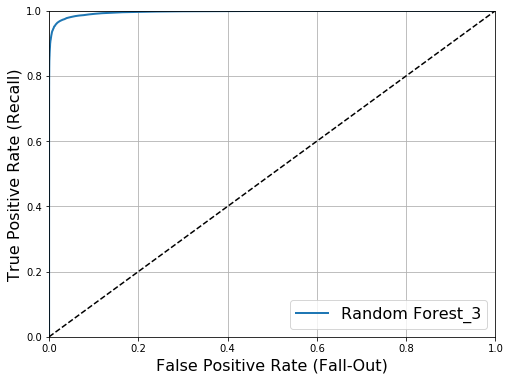

In [55]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest_3")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()